In [52]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [53]:
dataset = pd.read_csv("./R03_25")


In [54]:
dataset.drop(columns={"Unnamed: 0"}, inplace=True)

In [55]:
dataset.head()

,Fc5.,Fc3.,Fc1.,Fcz.,Fc2.,Fc4.,Fc6.,C5..,C3..,C1..,...,Po7.,Po3.,Poz.,Po4.,Po8.,O1..,Oz..,O2..,Iz..,label
0,-57.0,-13.0,-15.0,-12.0,-13.0,-8.0,-40.0,-54.0,-12.0,-14.0,...,-38.0,-42.0,-68.0,-76.0,-103.0,-51.0,-56.0,-124.0,-28.0,0
1,-49.0,-11.0,-10.0,-12.0,-19.0,-24.0,-58.0,-51.0,-19.0,-23.0,...,-55.0,-63.0,-82.0,-87.0,-99.0,-59.0,-70.0,-149.0,-40.0,0
2,-55.0,-17.0,-16.0,-19.0,-24.0,-29.0,-66.0,-61.0,-30.0,-36.0,...,-63.0,-72.0,-91.0,-92.0,-91.0,-67.0,-77.0,-153.0,-37.0,0
3,-73.0,-42.0,-40.0,-37.0,-37.0,-40.0,-71.0,-78.0,-53.0,-53.0,...,-52.0,-66.0,-100.0,-105.0,-105.0,-67.0,-72.0,-148.0,-26.0,0
4,-87.0,-53.0,-52.0,-51.0,-45.0,-43.0,-71.0,-87.0,-65.0,-64.0,...,-82.0,-90.0,-117.0,-119.0,-118.0,-75.0,-82.0,-161.0,-35.0,0


In [56]:
data = dataset.iloc[:, :8]
data['label'] = dataset['label']

In [57]:
data.head()

,Fc5.,Fc3.,Fc1.,Fcz.,Fc2.,Fc4.,Fc6.,C5..,label
0,-57.0,-13.0,-15.0,-12.0,-13.0,-8.0,-40.0,-54.0,0
1,-49.0,-11.0,-10.0,-12.0,-19.0,-24.0,-58.0,-51.0,0
2,-55.0,-17.0,-16.0,-19.0,-24.0,-29.0,-66.0,-61.0,0
3,-73.0,-42.0,-40.0,-37.0,-37.0,-40.0,-71.0,-78.0,0
4,-87.0,-53.0,-52.0,-51.0,-45.0,-43.0,-71.0,-87.0,0


In [58]:
from sklearn.model_selection import train_test_split
X = data.drop(columns={"label"})
Y = data['label']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
X_train = np.array(X_train)
X_test = np.array(X_test)
scaler = StandardScaler()
X_train_scaled =  scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_reshaped = X_train_scaled.reshape(X_train.shape[0],X_train.shape[1],1)
X_test_reshaped = X_test_scaled.reshape(X_test.shape[0],X_test.shape[1],1)




In [70]:
train_accuracies = []

In [71]:
model = Sequential()
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Conv1D(64, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Conv1D(128, kernel_size=1, activation='relu'))
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Conv1D(128, kernel_size=1, activation='relu'))
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))


In [72]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [73]:
epochs = 100
for epoch in range(epochs):
    print(f"epoch {epoch+1}/100")
    history = model.fit(X_train_reshaped, Y_train, epochs=1)  
    train_accuracies.append(history.history['acc'][0])



epoch 1/100
Train on 394560 samples
394560/394560 [==============================] - 42s 105us/sample - loss: 1.0183 - acc: 0.5116
epoch 2/100
Train on 394560 samples
394560/394560 [==============================] - 41s 104us/sample - loss: 0.9906 - acc: 0.5267
epoch 3/100
Train on 394560 samples
394560/394560 [==============================] - 41s 104us/sample - loss: 0.9733 - acc: 0.5356
epoch 4/100
Train on 394560 samples
394560/394560 [==============================] - 44s 111us/sample - loss: 0.9605 - acc: 0.5427
epoch 5/100
Train on 394560 samples
394560/394560 [==============================] - 45s 115us/sample - loss: 0.9501 - acc: 0.5478
epoch 6/100
Train on 394560 samples
394560/394560 [==============================] - 45s 115us/sample - loss: 0.9425 - acc: 0.5519
epoch 7/100
Train on 394560 samples
394560/394560 [==============================] - 45s 115us/sample - loss: 0.9354 - acc: 0.5561
epoch 8/100
Train on 394560 samples
394560/394560 [==============================] 

In [74]:
test_loss, test_accuracy = model.evaluate(X_test_reshaped, Y_test, verbose=0)

print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

Test Loss: 0.9388
Test Accuracy: 0.5755


In [75]:
print(train_accuracies)

[0.5115622, 0.52669555, 0.5356093, 0.5426703, 0.5478381, 0.5518958, 0.556103, 0.5599579, 0.5643096, 0.56657034, 0.5691859, 0.5706027, 0.5736466, 0.5758719, 0.5770174, 0.5786319, 0.5807203, 0.5821751, 0.5836603, 0.5848109, 0.58607817, 0.58696014, 0.587794, 0.58837694, 0.5900471, 0.5906934, 0.5915399, 0.59207726, 0.593015, 0.5934484, 0.59408456, 0.5948753, 0.5953138, 0.5959423, 0.5962794, 0.59691304, 0.5976505, 0.5981017, 0.59862125, 0.598715, 0.5998201, 0.60009885, 0.6006463, 0.6013129, 0.6011963, 0.6017285, 0.6020276, 0.60176903, 0.60242295, 0.60224044, 0.60224044, 0.6034393, 0.6031478, 0.6038777, 0.6042579, 0.6044936, 0.60388535, 0.60473436, 0.60495234, 0.6051247, 0.60589266, 0.60586476, 0.6046964, 0.6059991, 0.60668844, 0.606653, 0.606985, 0.6061309, 0.607464, 0.6063463, 0.607497, 0.6068633, 0.60754514, 0.607355, 0.6075882, 0.6067189, 0.60765153, 0.6074995, 0.6082294, 0.6076845, 0.6081838, 0.60851073, 0.60818887, 0.60794556, 0.6087743, 0.6087186, 0.6087211, 0.6097501, 0.6081534, 0.60

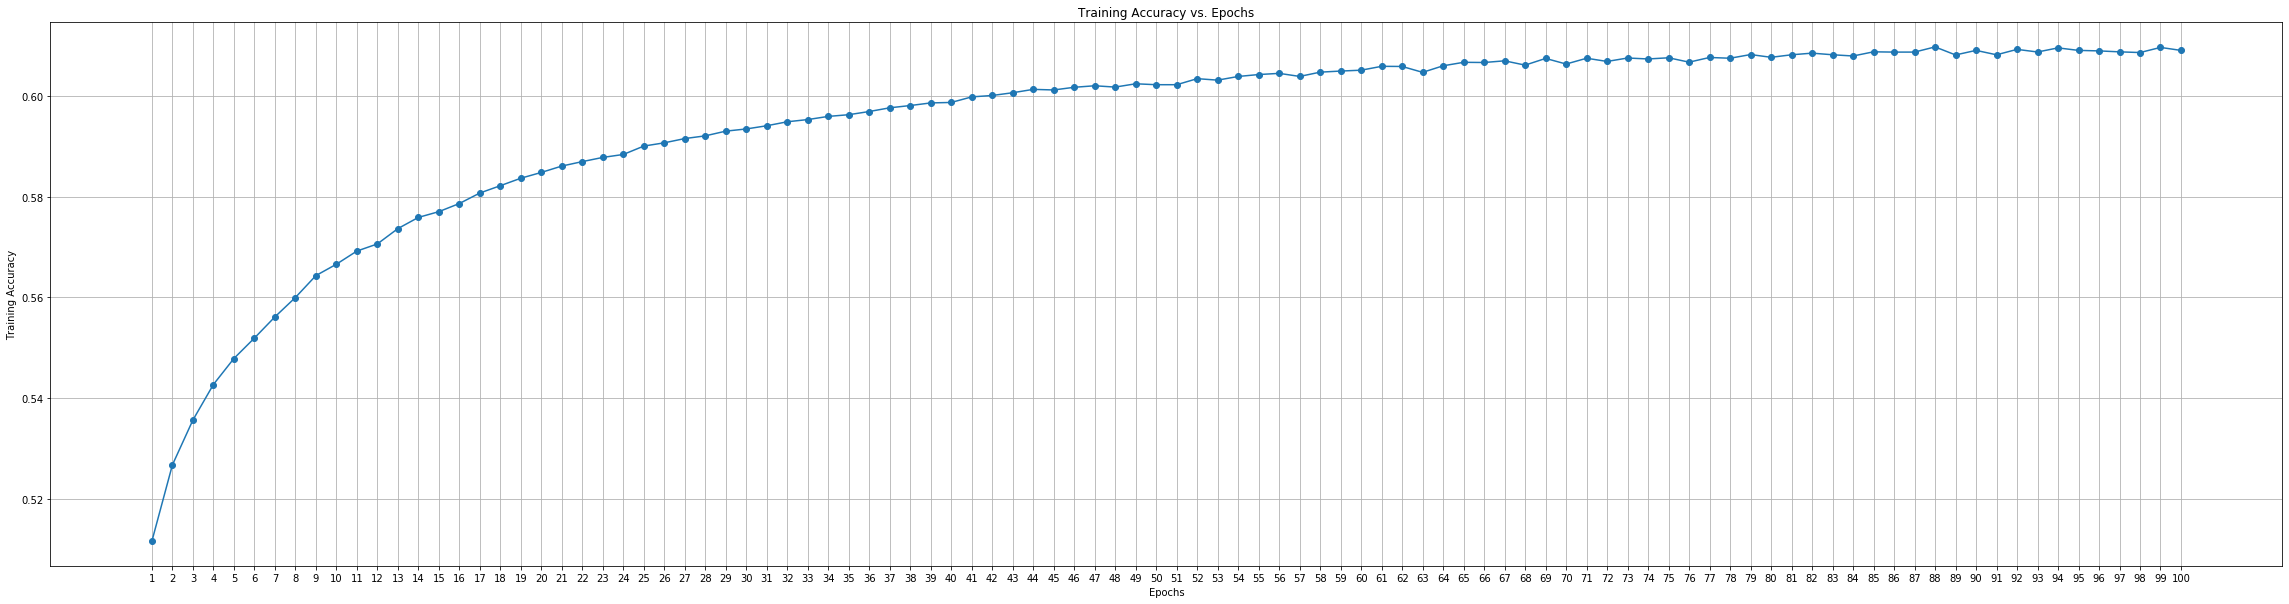

In [76]:
epochs_list = [i for i in range(1,epochs+1)]
plt.figure(figsize=(40,10))
plt.plot(epochs_list, train_accuracies, marker='o', linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy vs. Epochs')
plt.grid(True)
plt.xticks(range(1, 101))

plt.show()